In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("joebeachcapital/customer-segmentation")

print("Path to dataset files:", path)

100%|██████████| 1.55k/1.55k [00:00<00:00, 1.87MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/joebeachcapital/customer-segmentation/versions/1


In [51]:
# Mall_Customers.csv
import pandas as pd
df = pd.read_csv(path + "/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)

In [6]:
kmeans.fit_predict(df.drop("CustomerID", axis=1))

array([2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1], dtype=int32)

In [8]:
df["Cluster"] = kmeans.fit_predict(df.drop("CustomerID", axis=1))

In [9]:
df["Cluster"].value_counts()

,count
Cluster,
0,124
1,41
2,35


In [10]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,0
3,4,0,23,16,77,2
4,5,0,31,17,40,2


In [15]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=20, min_samples=5)
df["Cluster_DBSCAN"] = dbscan.fit_predict(df)

In [16]:
df["Cluster_DBSCAN"].value_counts()

,count
Cluster_DBSCAN,
0,124
1,39
2,32
-1,5


In [17]:
from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering(n_clusters=3)
df["Cluster_Hierarchical"] = hierarchical.fit_predict(df)

In [18]:
df["Cluster_Hierarchical"].value_counts()

,count
Cluster_Hierarchical,
0,76
1,71
2,53


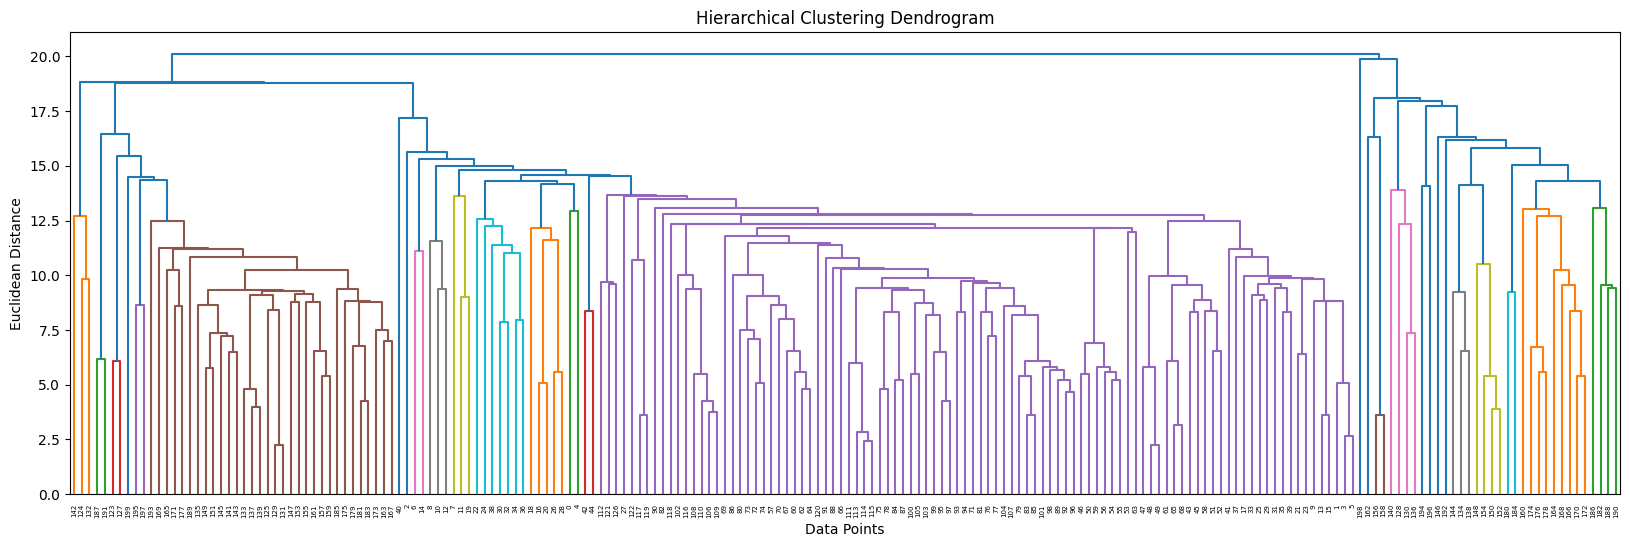

In [19]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(df)

plt.figure(figsize=(20, 6))
dendrogram(linked, orientation='top', distance_sort='ascending', show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()


In [20]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler




scaler = StandardScaler()
standardized_data = scaler.fit_transform(df.drop("CustomerID", axis=1))

pca = PCA()
principal_components = pca.fit_transform(standardized_data)

df_pca = pd.DataFrame(principal_components)



df_pca.head()


,0,1,2,3,4,5,6
0,-2.568218,0.888892,1.501153,-1.587554,-0.580479,-1.057621,-0.010382
1,-2.203542,1.844381,1.481398,-0.541932,-0.578394,0.399190,-0.184582
2,-1.721799,-1.227324,-0.788103,-2.299766,-0.107528,-0.961515,-1.119928
3,-2.350495,1.716057,-0.495783,-0.543814,-0.903820,0.362236,0.039106
4,-1.897548,0.725208,-0.466012,-1.139832,-1.350674,-0.148817,0.663929


In [28]:
pca = PCA(2)
principal_components = pca.fit_transform(standardized_data)

df_pca = pd.DataFrame(principal_components)



df_pca.head()


,0,1
0,-2.568218,0.888892
1,-2.203542,1.844381
2,-1.721799,-1.227324
3,-2.350495,1.716057
4,-1.897548,0.725208


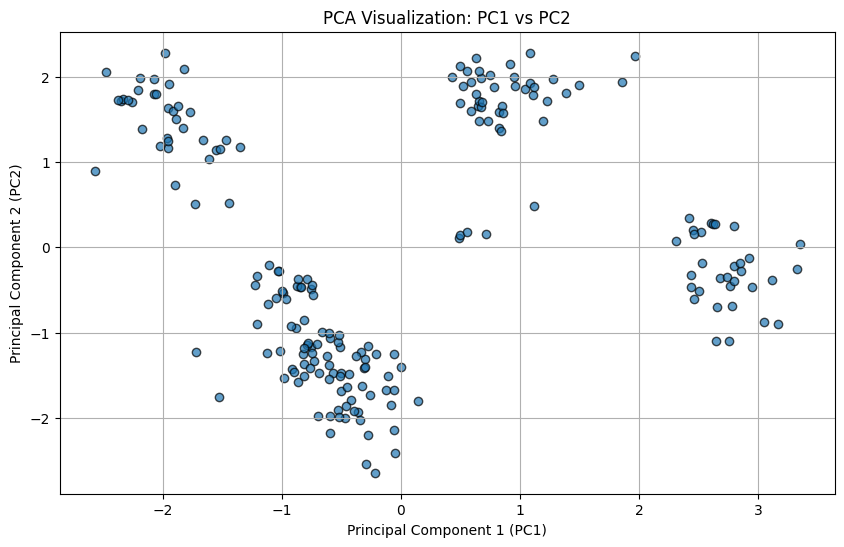

In [22]:
import matplotlib.pyplot as plt

# Scatter plot of PC1 vs PC2
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[0], df_pca[1], alpha=0.7, edgecolors='k')
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.title("PCA Visualization: PC1 vs PC2")
plt.grid(True)
plt.show()


In [ ]:
df_pca.head()

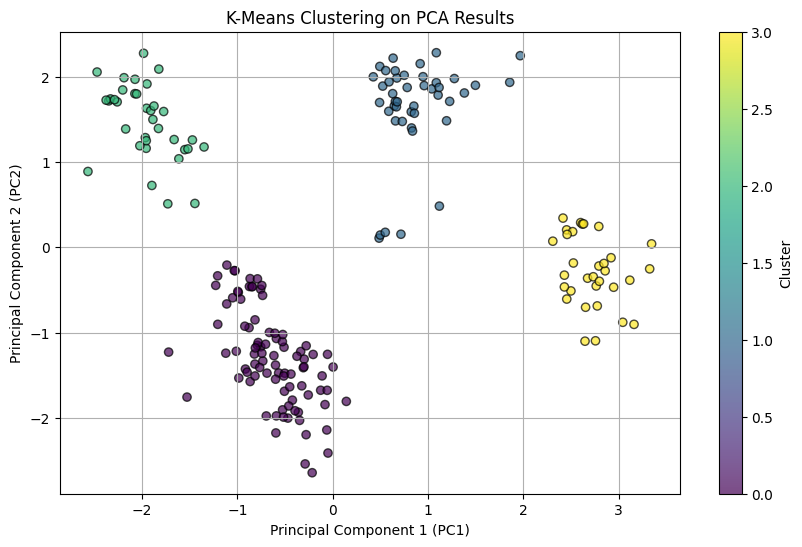

In [27]:
kmeans_pca = KMeans(n_clusters=4, random_state=42, n_init=10)
df_pca["Cluster"] = kmeans_pca.fit_predict(df_pca)

plt.figure(figsize=(10, 6))
plt.scatter(df_pca[0], df_pca[1], c=df_pca["Cluster"], cmap="viridis", alpha=0.7, edgecolors='k')
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.title("K-Means Clustering on PCA Results")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()


In [30]:
df_pca["Cluster"].value_counts()

,count
Cluster,
0,163
1,32
-1,5


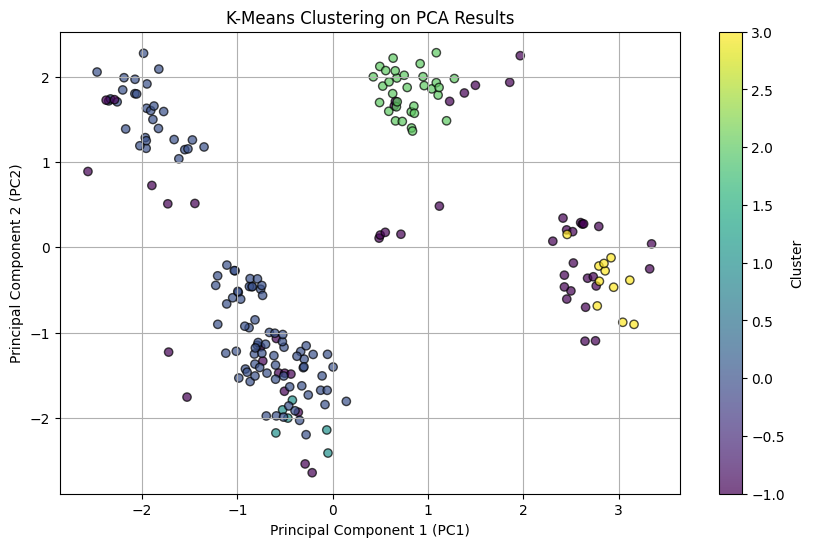

In [43]:
pca = PCA(2)
principal_components = pca.fit_transform(standardized_data)

df_pca = pd.DataFrame(principal_components)
kmeans_pca = DBSCAN(eps=15, min_samples=5)
df_pca["Cluster"] = kmeans_pca.fit_predict(df)

plt.figure(figsize=(10, 6))
plt.scatter(df_pca[0], df_pca[1], c=df_pca["Cluster"], cmap="viridis", alpha=0.7, edgecolors='k')
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.title("K-Means Clustering on PCA Results")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()


In [ ]:
pca = PCA(2)
principal_components = pca.fit_transform(standardized_data)

df_pca = pd.DataFrame(principal_components)
kmeans_pca = DBSCAN(eps=15, min_samples=5)
df_pca["Cluster"] = kmeans_pca.fit_predict(df)

plt.figure(figsize=(10, 6))
plt.scatter(df_pca[0], df_pca[1], c=df_pca["Cluster"], cmap="viridis", alpha=0.7, edgecolors='k')
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.title("K-Means Clustering on PCA Results")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()


In [46]:
df_pca

,0,1,Cluster
0,-2.568218,0.888892,-1
1,-2.203542,1.844381,0
2,-1.721799,-1.227324,-1
3,-2.350495,1.716057,0
4,-1.897548,0.725208,-1
...,...,...,...
195,1.496874,1.898847,-1
196,0.715380,0.153897,-1
197,1.856782,1.933659,-1
198,1.118820,0.483247,-1


In [61]:
df_pca.rename(columns={0: "PC1", 1: "PC2",2:"PC3"}, inplace=True)

In [66]:
import plotly.express as px
pca = PCA(3)
principal_components = pca.fit_transform(standardized_data)

df_pca = pd.DataFrame(principal_components)
kmeans_pca = AgglomerativeClustering(n_clusters=6)
df_pca["Cluster"] = kmeans_pca.fit_predict(df_pca)
df_pca.rename(columns={0: "PC1", 1: "PC2",2:"PC3"}, inplace=True)
fig = px.scatter_3d(df_pca, x="PC1", y="PC2", z="PC3",
              color='Cluster')
fig.show()